In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from keras.utils import load_img
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("mining.csv")

products = []

for i in data['img']:
    product = []
    product.append(i)
    products.append(product)

for i in range (len(data['description'])):
    products[i].append(data['description'][i])

img = [i[0] for i in products]
desc = [i[1] for i in products]

In [4]:
s = set()
arr, all_colors = [], []

for str in desc:
    x = str.split()
    all_colors.append(x[0])
    
    for elem in x:
        s.add(elem) 

all_colors_set = set(all_colors)
colors = list(all_colors_set)      
    
for str in desc:
    x = str.split()
    res = dict.fromkeys(s, 0)
    
    for elem in x:
        if elem in colors:
            res[elem] += 1
        else:
            res[elem] += 2
    arr.append(res)  

In [5]:
bigArr = []

for x in arr:
    l = []
    for i in x.values():
        l.append(i)
    bigArr.append(l)
    
np_arr = np.vstack(bigArr)

In [91]:
def getRecommendation(inp):
    
    inparr = inp.split()
    li = []
    
    for elem in inparr:
        if elem in s:
            li.append(elem)
    
    testres = dict.fromkeys(s, 0)

    for i in testres.keys():
        if i in li:
            if i in colors:
                testres[i] += 1
            else:
                testres[i] += 2
    
    testl = []
    
    for i in testres.values():      
        testl.append(i)

    npt = np.vstack([np_arr,testl])  
    
    img_copy = img.copy()
    img_copy.append(' '.join(li))
    
    cosSimilarities = cosine_similarity(npt)
    cos_similarities_df = pd.DataFrame(cosSimilarities, columns=img_copy, index=img_copy)
    
    closest_imgs = cos_similarities_df[img_copy[len(img_copy) - 1]].sort_values(ascending=False)[1:4+1].index
    
    for i in closest_imgs:
        if i == img_copy[-1]:
            continue
        pic = load_img("mining/" + i)
        plt.imshow(pic)
        plt.axis('off')
        plt.show()  

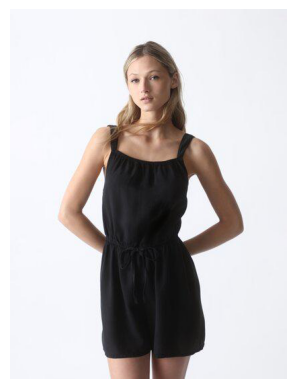

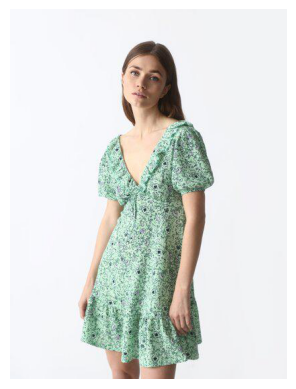

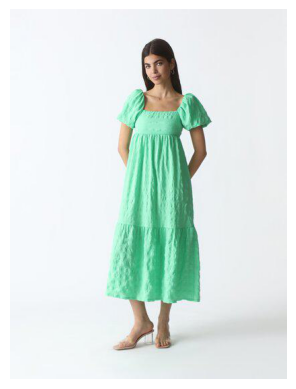

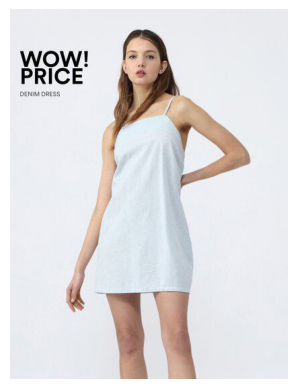

In [92]:
getRecommendation("i want a dress")

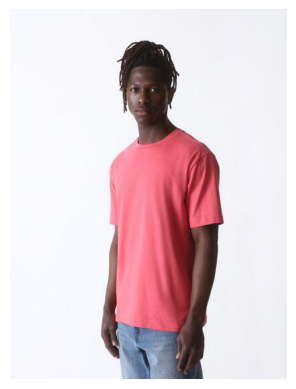

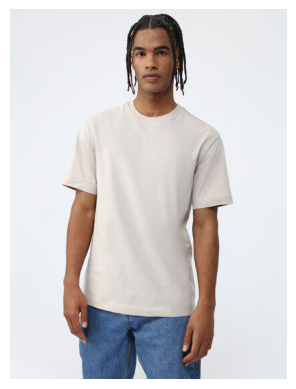

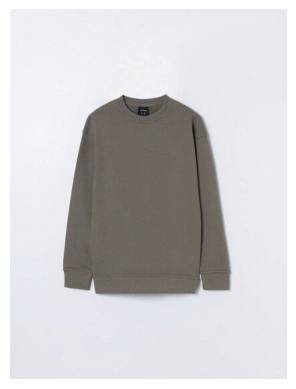

FileNotFoundError: [Errno 2] No such file or directory: 'mining/longlseeve13.jpg'

In [93]:
getRecommendation("i want to buy a tshirt")

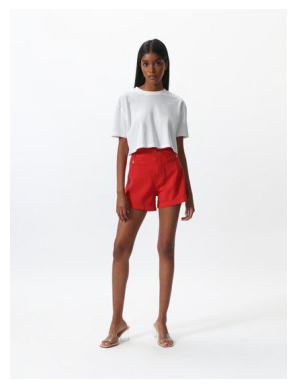

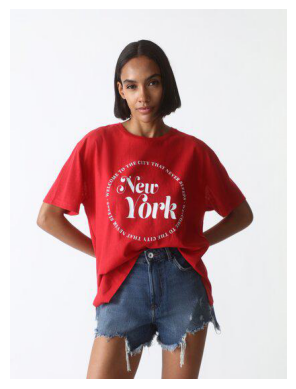

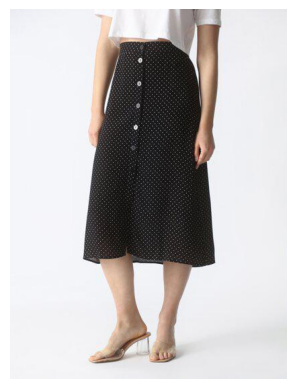

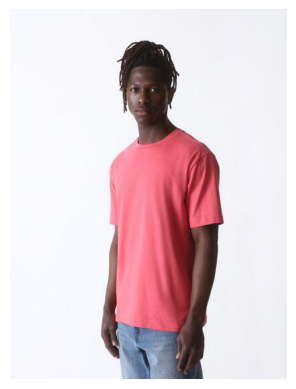

In [95]:
getRecommendation("i want red clothes")

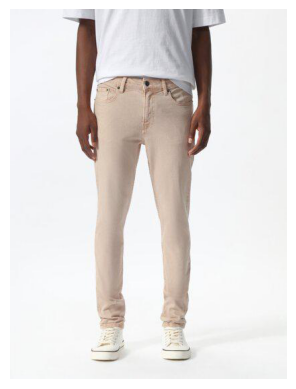

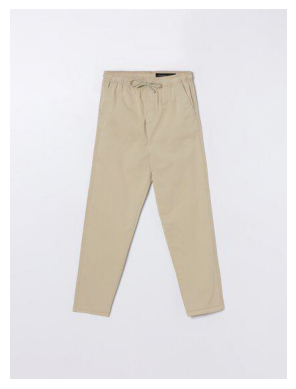

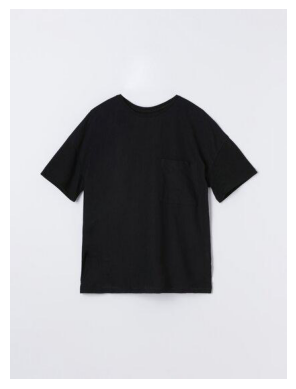

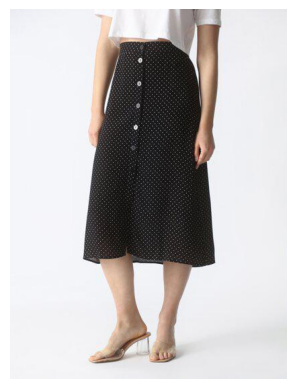

In [96]:
getRecommendation("i want kaki clothes")

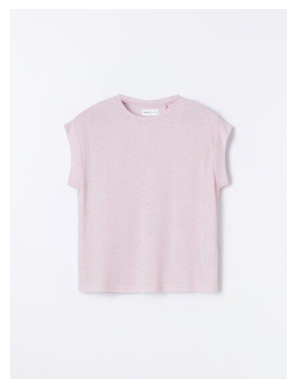

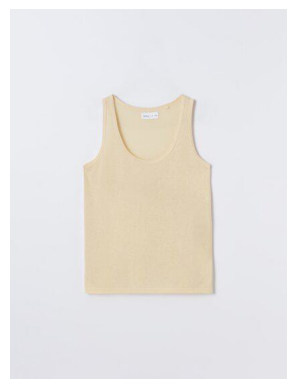

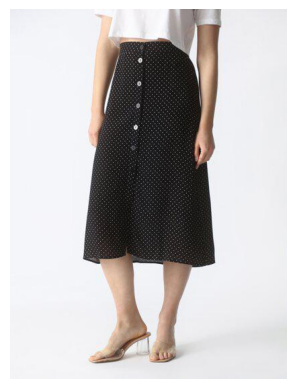

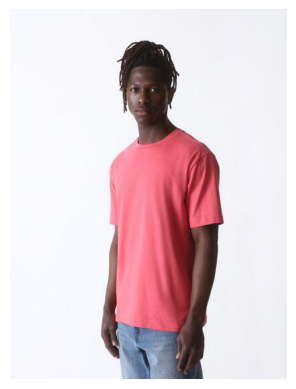

In [97]:
getRecommendation("i want a top")